In [4]:
import csv

# Open the input file
with open('2024-02.txt', 'r') as file:
    lines = file.readlines()

# Prepare the output file
with open('output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['date', 'temp'])

    # Iterate over each line in the file
    for line in lines:
        # Split the line by whitespace
        parts = line.split()
        if len(parts) > 3:  # Ensure there's enough data in the line
            try:
                # Extract date and temperature assuming the format is consistent
                date = parts[2]  # Assuming date is the third element
                temp = parts[3]  # Assuming temperature is the fourth element

                # Write to CSV if data is valid
                writer.writerow([date, temp])
            except ValueError:
                # Handle any conversion errors
                continue


In [6]:
import csv

# Define input and output file paths
input_file = '2024-02.txt'
output_file = 'compiled_data2024.csv'

# Initialize a list to store the extracted data
extracted_data = []

# Read the input file
with open(input_file, 'r') as file:
    for line in file:
        # Split the line into columns based on whitespace
        columns = line.split()
        
        # Check if the line contains a date and temperature data
        if len(columns) > 3 and columns[2].startswith('2024'):
            date = columns[2]  # Assuming date is in the third column
            temperature = columns[3]  # Assuming temperature is in the fourth column
            extracted_data.append([date, temperature])

# Write the extracted data to a CSV file
with open(output_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write the header
    csvwriter.writerow(['date', 't'])
    # Write the data rows
    csvwriter.writerows(extracted_data)

print(f"Data extracted and saved to {output_file}")


Data extracted and saved to compiled_data2024.csv


In [13]:
import pandas as pd

# Adjust the file path as necessary
file_path = '2024-02.txt'

# Define the expected number of columns (set this based on your data)
expected_number_of_columns = 120  # Adjust this number according to your data

# Initialize an empty list to store the cleaned data
data = []

# Open the file and read line by line
with open(file_path, 'r') as file:
    for line in file:
        # Split the line based on whitespace
        row = line.split()
        
        # Handle rows with the expected number of columns
        if len(row) == expected_number_of_columns:
            data.append(row)
        else:
            print(f"Skipping malformed line: {line.strip()}")

# Convert the list of rows into a DataFrame
df = pd.DataFrame(data)

# Replace '999999' with NaN
df.replace('999999', pd.NA, inplace=True)

# Display the first few rows of the DataFrame
df.head()


Skipping malformed line: Record Selection	HTML tutorial
Skipping malformed line: Stations
Skipping malformed line: User
Skipping malformed line: Tehran
Skipping malformed line: Type data
Skipping malformed line: Synop
Skipping malformed line: 
Skipping malformed line: Ostan
Skipping malformed line: Tehran
Skipping malformed line: 
Skipping malformed line: Station
Skipping malformed line: 99369
Skipping malformed line: 1
Skipping malformed line: 
Skipping malformed line: Period
Skipping malformed line: Start Date
Skipping malformed line: 2024/02/01
Skipping malformed line: 
Skipping malformed line: End Date
Skipping malformed line: 2024/03/01
Skipping malformed line: 
Skipping malformed line: hours
Skipping malformed line: All selected
Skipping malformed line: 24
Skipping malformed line: 
Skipping malformed line: QC Flags
Skipping malformed line: 
Skipping malformed line: 1. Global Flag - All
Skipping malformed line: 
Skipping malformed line: Select recordsLegend
Skipping malformed line

""


In [14]:
df

""


In [24]:
import pandas as pd
import numpy as np

# Define the file path
file_path = '2024-02.txt'

# Step 1: Read the data using Pandas
# Use sep='\t' assuming the data is tab-separated or has consistent spaces
df = pd.read_csv(file_path, sep='\t', engine='python', header=0, skip_blank_lines=True)



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Columns: 140 entries, Row to contentmessage
dtypes: float64(68), int64(69), object(3)
memory usage: 501.1+ KB


In [21]:
df.columns

Index(['Row', 'station_id', 'date', 't', 'qt', 'td', 'qtd', 'twet', 'qtwet',
       'u',
       ...
       'qmusoil100', 'ew', 'qew', 'ews', 'qews', 'tmin_12h', 'qtmin_12h',
       'tmax_12h', 'qtmax_12h', 'contentmessage'],
      dtype='object', length=140)

In [26]:
df2 = df[['t', 'td', 'twet', 'u']]

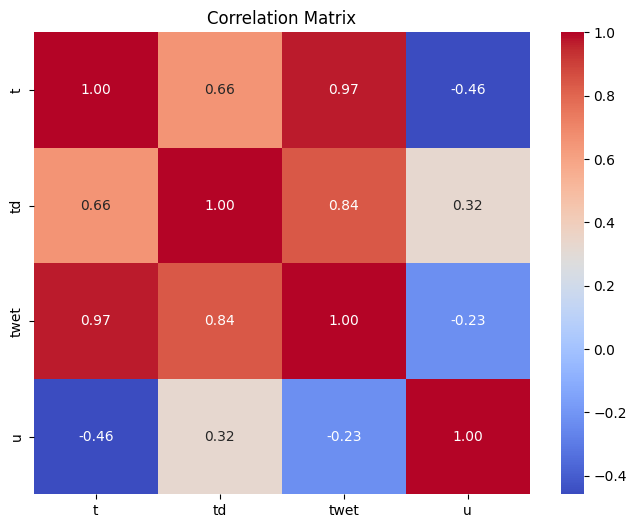

In [27]:

# Step 3: Calculate the correlation matrix
corr = df2.corr()

# Step 4: Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
